### Loading the Data

This dataset was created using a subset of data from [SimpleMaps.com](https://simplemaps.com/data/us-counties)

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN/main/us_counties/us_counties.csv'
df = pd.read_csv(url)
df.head()

,county,state,population,latitude,longitude
0,Los Angeles,CA,9936690,34.3219,-118.2247
1,Cook,IL,5225367,41.8401,-87.8168
2,Harris,TX,4726177,29.8578,-95.3938
3,Maricopa,AZ,4430871,33.3490,-112.4915
4,San Diego,CA,3289701,33.0343,-116.7351


### Bad Data Visualization

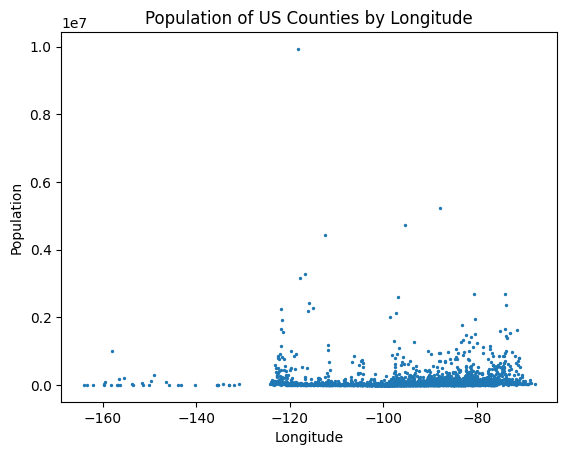

In [134]:
plt.scatter(df['longitude'], df['population'], s=2)
plt.title('Population of US Counties by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Population')
plt.show()

### Good Data Visualization

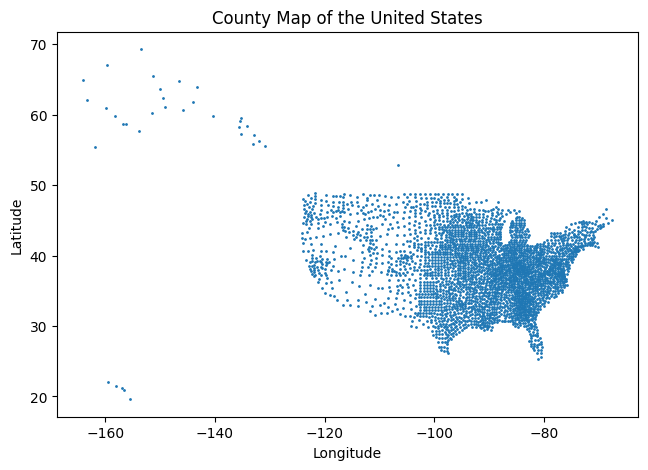

In [135]:
plt.figure(figsize=(7.5,5))
plt.scatter(df['longitude'], df['latitude'], s=1)
plt.title('County Map of the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Data Entry Errors


Sometimes there are errors in the data that we don't know about until we can see it. 

The red point in the following plot is a real error that was found in the dataset. *The US does not have any counties in Canada!* Through a brief investigation of this anomaly, we can discover that this data point was actually meant to represent **Aleutians West County**, the westmost county in Alaska. However, the longitude for this county was incorrectly recorded when the dataset was compiled.

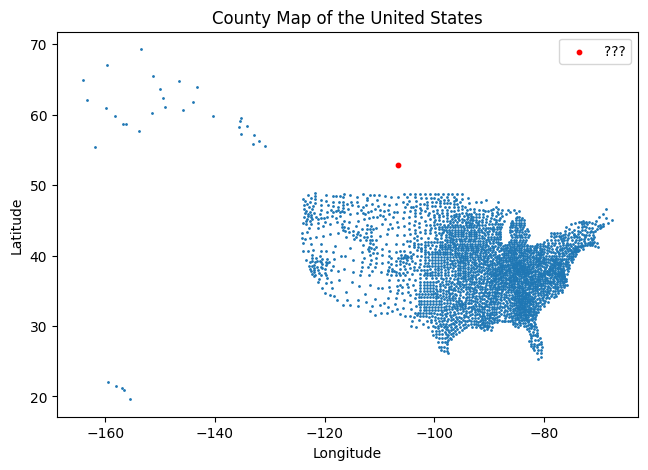

In [136]:
df1 = df[df['latitude'] == 52.7985]

plt.figure(figsize=(7.5,5))
plt.scatter(df['longitude'], df['latitude'], s=1)
plt.scatter(df1['longitude'], df1['latitude'], s=10, c='red', label='???')
plt.title('County Map of the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### Removing and Isolating Data

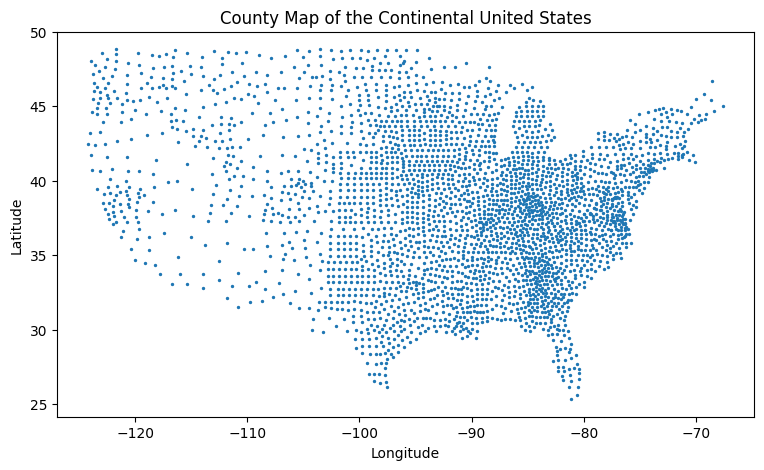

In [137]:
cont_df = df[df['state'] != 'AK']
cont_df = cont_df[cont_df['state'] != 'HI']

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], s=2)
plt.title('County Map of the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Incorporating Additional Data Variables

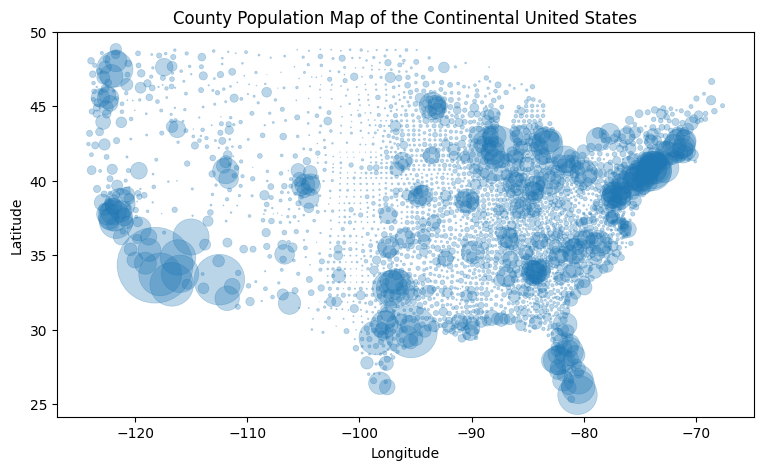

In [138]:
point_size = [0.0003*p for p in cont_df['population']]

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], alpha=0.3, s=point_size, linewidths=0.5)
plt.title('County Population Map of the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### More Styling Techniques

`color_spectrum` - List created using [Viridis Palette Generator](https://waldyrious.net/viridis-palette-generator/).

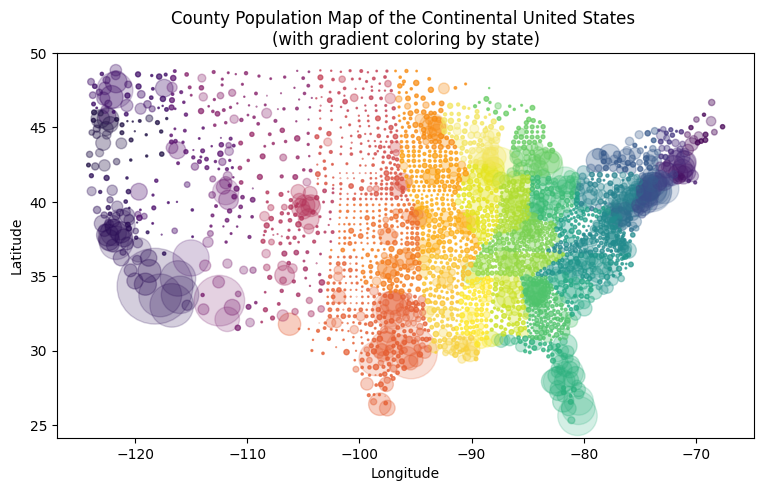

In [139]:
color_spectrum = ['#440154', '#471063', '#481d6f', '#472a7a', '#453781', '#414487', '#3c4f8a', '#375a8c', '#32648e', '#2e6f8e', '#2a788e', '#26828e', '#228b8d', '#1f958b', '#1f9f88', '#22a884', '#2cb17e', '#3bbb75', '#4ec36b', '#63cb5f', '#7ad151', '#95d840', '#b0dd2f', '#cae11f', '#e5e419', '#fde725', '#f3e55d', '#f7d13d', '#fac026', '#fcac11', '#fb9b06', '#f8890c', '#f47918', '#ed6925', '#e55c30', '#da4e3c', '#cf4446', '#c13a50', '#b43359', '#a52c60', '#972766', '#87216b', '#781c6d', '#69166e', '#5a116e', '#4a0c6b', '#3b0964', '#290b55', '#1b0c41', '#0d0829', '#040314', '#000004']
states_by_avg_longitude = ['ME', 'RI', 'MA', 'NH', 'VT', 'CT', 'NJ', 'NY', 'DE', 'MD', 'DC', 'PA', 'VA', 'NC', 'WV', 'SC', 'FL', 'OH', 'GA', 'MI', 'KY', 'TN', 'IN', 'AL', 'IL', 'MS', 'WI', 'LA', 'AR', 'MO', 'IA', 'MN', 'OK', 'KS', 'TX', 'NE', 'SD', 'ND', 'CO', 'NM', 'WY', 'MT', 'AZ', 'UT', 'ID', 'NV', 'WA', 'CA', 'OR']

colors = []
for x in cont_df['state']:
    idx = states_by_avg_longitude.index(x)
    colors.append(color_spectrum[idx])

alpha = [0.2 if p>1000000 else 0.3 if p>100000 else 0.4 if p>50000 else 0.7 for p in cont_df['population']]

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], c=colors, alpha=alpha, s=point_size)
plt.title('County Population Map of the Continental United States \n(with gradient coloring by state)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


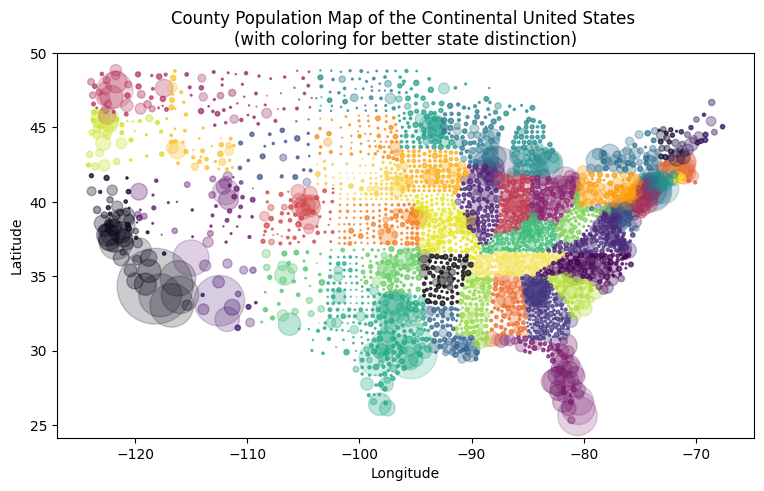

In [155]:
from random import shuffle

shuffle(color_spectrum)
colors = []
for x in cont_df['state']:
    idx = list(df['state'].unique()).index(x)
    colors.append(color_spectrum[idx])

plt.figure(figsize=(9,5))
plt.scatter(cont_df['longitude'], cont_df['latitude'], c=colors, alpha=alpha, s=point_size)
plt.title('County Population Map of the Continental United States \n(with coloring for better state distinction)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The following plot isn't necessarily an example of a great, informative visualization, but it does demonstrate just how specific and ridiculous plots can get with a wide array of styling techniques.

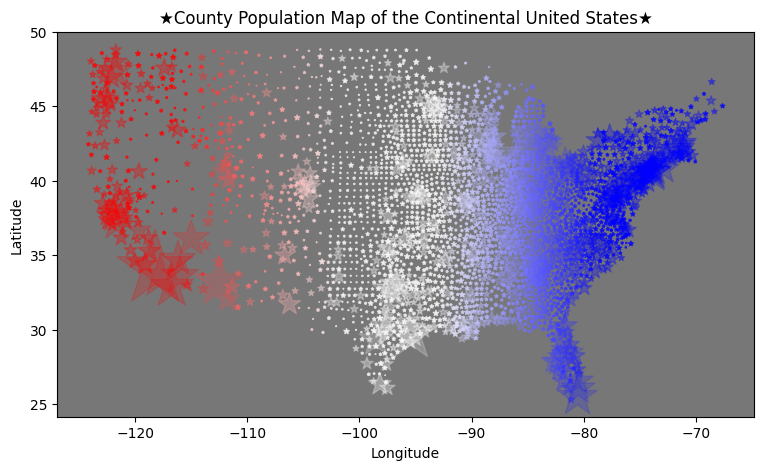

In [141]:
colors = []
for x in cont_df['longitude']:
    y = abs(x)-65
    if y <= 97.5/7.0:
        colors.append('#00f')
    elif y <= 195/7.0:
        rg = round(-255 + (238*y/13))
        colors.append('#%02X%02X%02X' % (rg, rg, 255))
    elif y > 357.5/7.0:
        colors.append('#f00')
    elif y > 260/7.0:
        gb = round(935 - (238*y/13))
        colors.append('#%02X%02X%02X' % (255, gb, gb))
    else:
        colors.append('#fff')

plt.figure(figsize=(9,5))
plt.axes().set_facecolor('#777')
plt.scatter(cont_df['longitude'], cont_df['latitude'], c=colors, alpha=alpha, marker=r"$\star$", s=point_size)
plt.title('★County Population Map of the Continental United States★')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Using Images

By overlaying the data points on to a topographical map of the US, we can analyze how the development and placement of some counties may have been influenced by the geography of the land.  

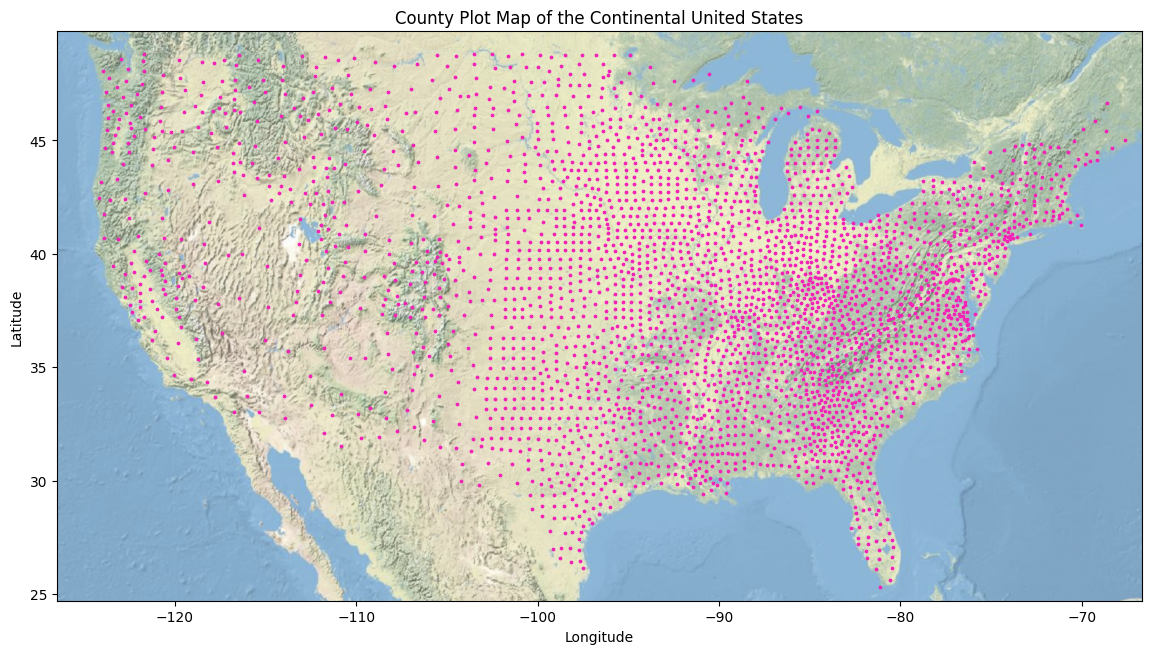

In [143]:
import matplotlib.image as mpimg
import urllib.request
import io

url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN/main/us_counties/topo_map.png'
with urllib.request.urlopen(url) as response:
   img = mpimg.imread(io.BytesIO(response.read()), format='png')

plt.figure(figsize=(14,10))
plt.imshow(img, extent=[-126.5, -66.7, 24.7, 49.8], aspect=5/4)
plt.scatter(cont_df['longitude'], cont_df['latitude'], s=3, c='#f224b8')
plt.title('County Plot Map of the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Your Turn

Learn more about your own state by isolating the county data and performing the visualization techniques you've learned.

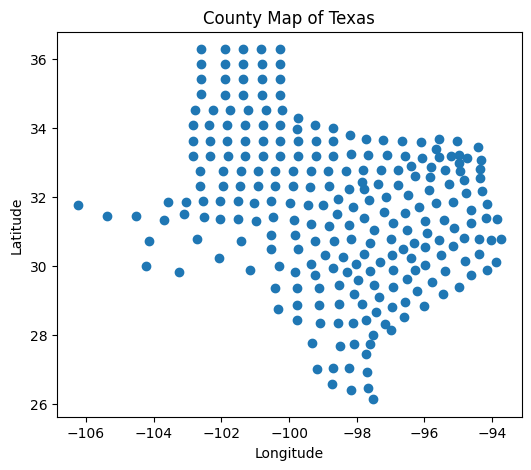

In [ ]:
state_df = df[df['state'] == 'TX']
plt.figure(figsize=(6,5))
plt.scatter(state_df['longitude'], state_df['latitude'])
plt.title('County Map of Texas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()